# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Dewi Wahidatul Karimah
- Email: dewikarimah780@mail.com
- Id Dicoding: dewi_karimah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

### Menyiapkan data yang akan digunakan

## Data Understanding

In [2]:
# data loading
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [6]:
df.duplicated().sum()

np.int64(0)

Terdapat beberapa informasi yang didapatkan
- data berjumlah 1470 baris dan 35 kolom
- kolom 'Attrition' yang nantinya akan digunakan untuk target/ label data dalam pemodelan machine learning memiliki data tipe float yang seharusnya integer
- kolom 'Attrition' memiliki data yang kosong sebesar 412 data
- data tidak memiliki data yang duplikat

## Data Preparation / Preprocessing

**Data Cleansing**

In [7]:
# Menghapus data kosong
df_clean = df.dropna()
df_clean.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Mengganti tipe data pada kolom Attrition
df_clean['Attrition']= df_clean['Attrition'].astype('int')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                  105

C:\Users\Dewi\AppData\Local\Temp\ipykernel_12192\2377735228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Attrition']= df_clean['Attrition'].astype('int')


**Feature Selection**

In [9]:
# Menggabungkan kolom kolom yang ingin digunakan
df_fix = df_clean[['Age', 'Attrition', 'Department', 'Gender', 'JobSatisfaction', 'EnvironmentSatisfaction',
                   'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance']]

df_fix.head()


,Age,Attrition,Department,Gender,JobSatisfaction,EnvironmentSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
1,37,1,Research & Development,Female,2,1,Married,4777,No,3,15,1
2,51,1,Research & Development,Male,3,1,Married,2461,Yes,3,18,4
3,42,0,Sales,Female,2,3,Married,13525,No,3,23,4
6,40,0,Sales,Male,4,2,Married,7457,Yes,4,6,2
7,55,1,Research & Development,Male,1,4,Married,19859,Yes,3,24,3


In [10]:
# Menyimpan data untuk pembuatan dashboard
df_fix.to_csv('result_data.csv', index=False)

## EDA

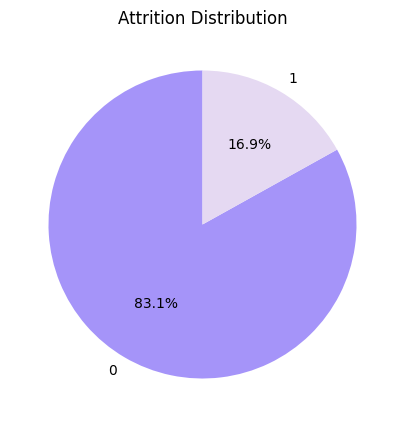

In [11]:
# Attrition
attrition_counts = df_fix['Attrition'].value_counts()

colors = ['#A594F9', '#E5D9F2']

plt.figure(figsize=(5,5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Attrition Distribution')
plt.show()

- Karyawan yang tidak pindah dari perusahaan lebih besar daripada yang pindah

<Axes: xlabel='Age', ylabel='Count'>

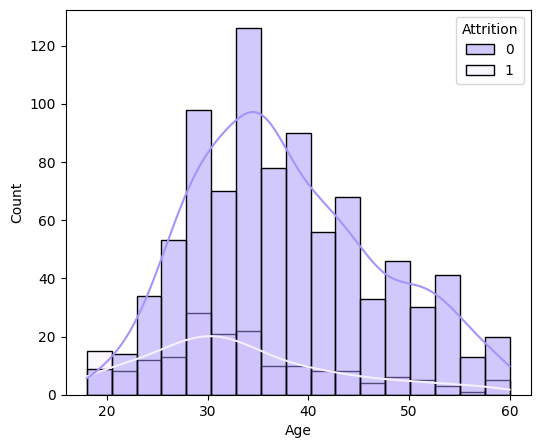

In [12]:
# Age
plt.figure(figsize=(6,5))
sns.histplot(data = df_fix, x="Age",hue="Attrition", kde=True,palette=["#A594F9","#F5EFFF"])

- Kisaran umur pegawai yang pindah/ meninggalkan perusahaan berumur 30-35 tahun

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

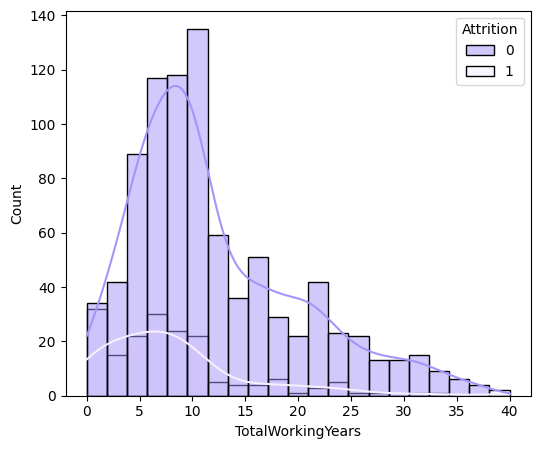

In [13]:
# Total working years
plt.figure(figsize=(6,5))
sns.histplot(data = df_fix, x="TotalWorkingYears",hue="Attrition", kde=True,palette=["#A594F9","#F5EFFF"])

- Pegawai yang meninggalkan perusahaan paling banyak saat 5-10 tahun mereka bekerja di perusahaan

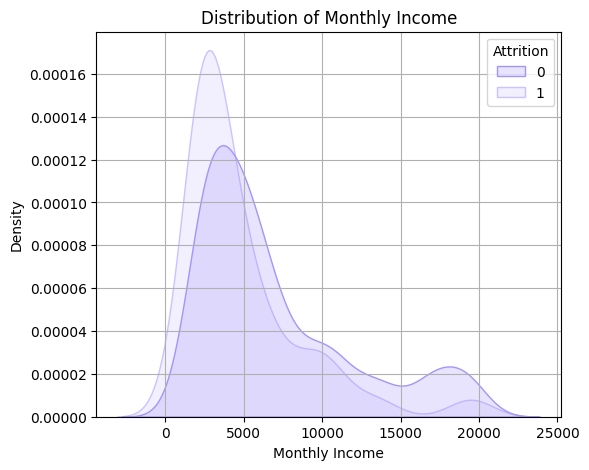

In [14]:
# Monthly income
plt.figure(figsize=(6, 5))
sns.kdeplot(data = df_fix, x = 'MonthlyIncome', hue="Attrition", fill=True, common_norm=False, palette=["#A594F9","#CDC1FF"])
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.grid()
plt.show()

- Gaji bulanan pegawai yang meninggalkan perusahaan paling banyak berada di bawah 5k

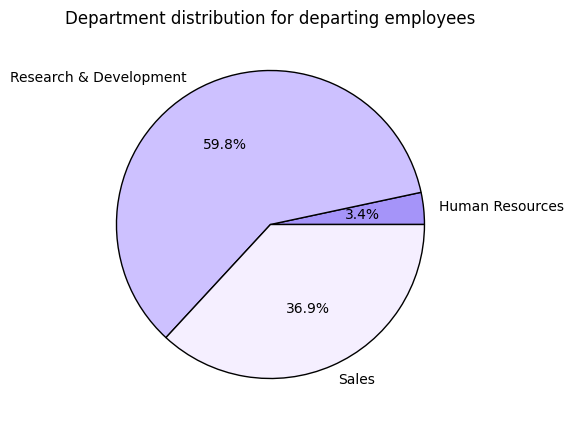

In [15]:
# Melihat departemen mana yang paling banyak mengalami attrition
department_counts = df_fix.groupby(['Department', 'Attrition'])['Department'].count()

# Mengambil data attrition yang berlabel 1
left_count = department_counts.xs(1, level='Attrition')

colors = ["#A594F9","#CDC1FF","#F5EFFF"]
plt.figure(figsize=(10, 5))
plt.pie(left_count, 
        labels=left_count.index, 
        colors=colors, 
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title('Department distribution for departing employees')
plt.show()

- Pegawai yang meninggalkan perusahaan paling banyak berada pada departemen research & development

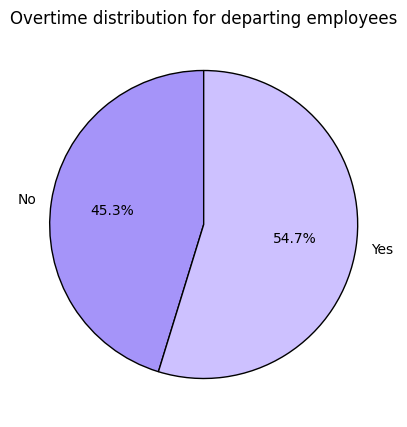

In [16]:
# Melihat apakah pekerja yang meninggalkan perusahaan mengalami overtime
overtime_counts = df_fix.groupby(['OverTime', 'Attrition'])['OverTime'].count()
left_count = overtime_counts.xs(1, level='Attrition')

colors = ["#A594F9","#CDC1FF"]
plt.figure(figsize=(10, 5))
plt.pie(left_count, 
        labels=left_count.index, 
        colors=colors, 
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'},
        startangle=90)
plt.title('Overtime distribution for departing employees')
plt.show()

- Kebanyakan pegawai yang meninggalkan perusahaan mengalami lembur kerja

C:\Users\Dewi\AppData\Local\Temp\ipykernel_12192\1806189015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_count, x='PerformanceRating', y='Count', palette=colors)


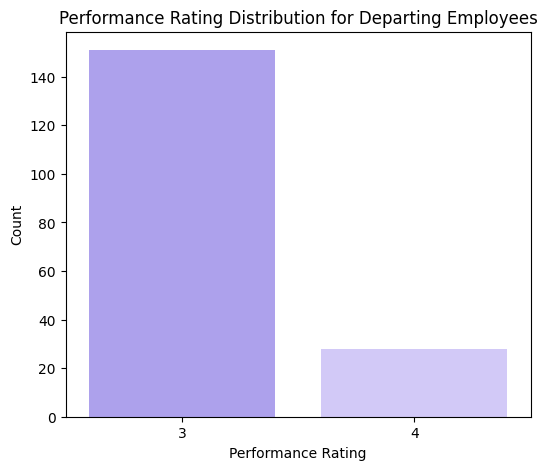

In [17]:
# Melihat rating performance pegawai yang meninggalkan perusahaan
performance_counts = df_fix.groupby(['PerformanceRating', 'Attrition'])['PerformanceRating'].count()
left_count = performance_counts.xs(1, level='Attrition').reset_index(name='Count')

colors = ["#A594F9","#CDC1FF"]
plt.figure(figsize=(6, 5))
sns.barplot(data=left_count, x='PerformanceRating', y='Count', palette=colors)
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Performance Rating Distribution for Departing Employees')
plt.show()

- Rating performa pekerjaan pegawai yang meninggalkan perusahaan paling banyak di rating 3

C:\Users\Dewi\AppData\Local\Temp\ipykernel_12192\4161801926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_count, x='WorkLifeBalance', y='Count', palette=colors)


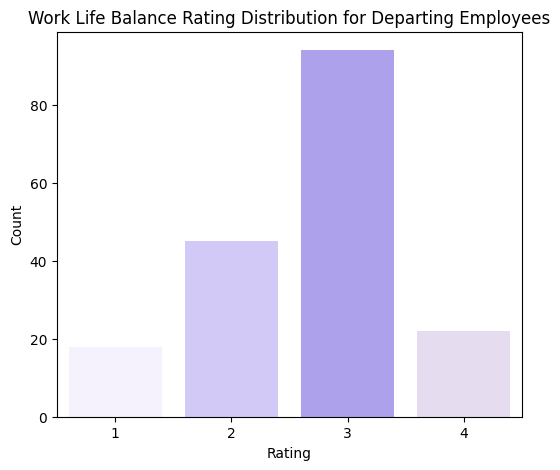

In [18]:
# Melihat rating work life balance pegawai yang meninggalkan perusahaan
worklife_counts = df_fix.groupby(['WorkLifeBalance', 'Attrition'])['WorkLifeBalance'].count()
left_count = worklife_counts.xs(1, level='Attrition').reset_index(name='Count')

colors = ["#F5EFFF","#CDC1FF","#A594F9", "#E5D9F2"]
plt.figure(figsize=(6, 5))
sns.barplot(data=left_count, x='WorkLifeBalance', y='Count', palette=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Work Life Balance Rating Distribution for Departing Employees')
plt.show()

- Rating work life balance pekerja yang meninggalkan perusahaan paling banyak adalah rating 3

## Modeling

**Data preprocessing**

In [19]:
# Encode data kateorikal
encode = LabelEncoder()

df_fix.loc[:,'Department'] = encode.fit_transform(df_fix['Department'])
df_fix.loc[:,'Gender'] = encode.fit_transform(df_fix['Gender'])
df_fix.loc[:,'MaritalStatus'] = encode.fit_transform(df_fix['MaritalStatus'])
df_fix.loc[:,'OverTime'] = encode.fit_transform(df_fix['OverTime'])

df_fix.head()

,Age,Attrition,Department,Gender,JobSatisfaction,EnvironmentSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
1,37,1,1,0,2,1,1,4777,0,3,15,1
2,51,1,1,1,3,1,1,2461,1,3,18,4
3,42,0,2,0,2,3,1,13525,0,3,23,4
6,40,0,2,1,4,2,1,7457,1,4,6,2
7,55,1,1,1,1,4,1,19859,1,3,24,3


In [20]:
# Normalisasi kolom
data = ['Age', 'MonthlyIncome', 'TotalWorkingYears']
df_fix[data] = df_fix[data].astype(float)

scaler = StandardScaler()
df_fix.loc[:,data] = scaler.fit_transform(df_fix[data])

df_fix.head()

C:\Users\Dewi\AppData\Local\Temp\ipykernel_12192\2789934877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix[data] = df_fix[data].astype(float)


,Age,Attrition,Department,Gender,JobSatisfaction,EnvironmentSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
1,-0.005929,1,1,0,2,1,1,-0.382376,0,3,0.444831,1
2,1.482487,1,1,1,3,1,1,-0.861343,1,3,0.819240,4
3,0.525648,0,2,0,2,3,1,1.426778,0,3,1.443254,4
6,0.313018,0,2,1,4,2,1,0.171869,1,4,-0.678394,2
7,1.907749,1,1,1,1,4,1,2.736699,1,3,1.568057,3


In [21]:
# SMOTE
x = df_fix.drop(['Attrition'], axis = 1)
y = df_fix.loc[:,'Attrition']

counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({0: 879, 1: 179})
Counter({1: 879, 0: 879})


In [22]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

print(f'Total keseluruhan data latih: {len(X_train)}')
print(f'Total keseluruhan data uji: {len(X_test)}')

Total keseluruhan data latih: 1406
Total keseluruhan data uji: 352


**Modelling**

In [43]:
RF_model = RandomForestClassifier(n_estimators = 65, random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=65, random_state=42)

## Evaluation

In [44]:
prediction_RF = RF_model.predict(X_test)

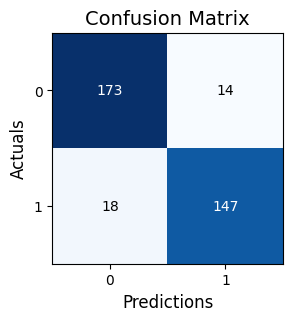

Akurasi = "90.91%"
Sensitivitas = "89.09%"
Spesifitas = "92.51%"


In [45]:
cm = confusion_matrix(y_test, prediction_RF)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print('Akurasi = "{}%"'.format(round((TP + TN) /
(TP + TN + FN + FP)*100,2)))
print('Sensitivitas = "{}%"'.format(round((TP) /
(TP + FN)*100,2)))
print('Spesifitas = "{}%"'.format(round((TN) /
(TN + FP)*100,2)))